# Vizly: a Business Intelligence Tool That Requires No Learning
## On-premises Data Analytics using Natural Language

## Introduction

Would you believe me if I said there isn't a single enterprise Business Intelligence (BI) tool powered solely by AI on the Internet? Of course, there are websites that claim to be "AI-powered data analysis platforms" but they are just wrapping OpenAI API with a fancy UI and a bit of prompt engineering. Besides, they have a huge disadvantage - you cannot use those tools in enterprise scenarios because policies don't permit uploading company data to external servers. 

That's why Vizly was built as a platform to analyze your data by asking questions in natural language instead of using BI tools that take months to master. You can access Vizly as a single user through the website or its enterprise version can be deployed on-premises without exposing sensitive company data to external APIs.

In this article, we will explore its features using a sample dataset.

## Setting up Vizly

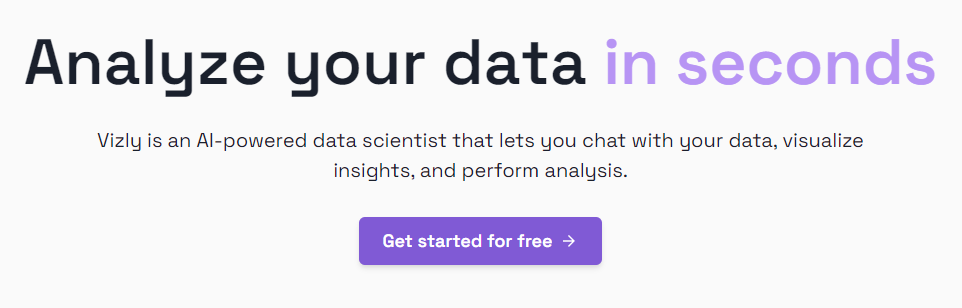

There is no complicated process to sign up for Vizly. Simply visit the [website](https://vizly.fyi/) and click on "Get started for free". Then, choose a plan that fits your needs. Currently, there are three:

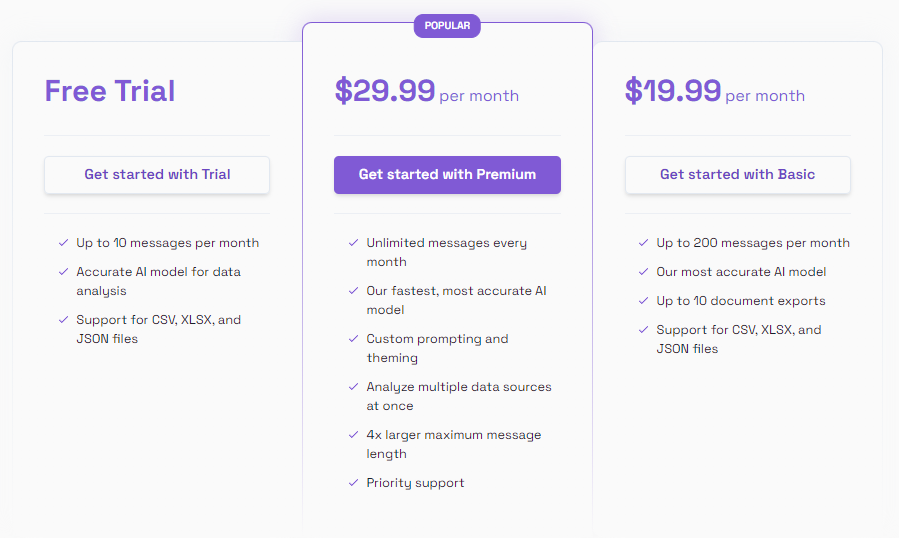

Afterward, you will be redirected to the chat UI which is similar to ChatGPT:

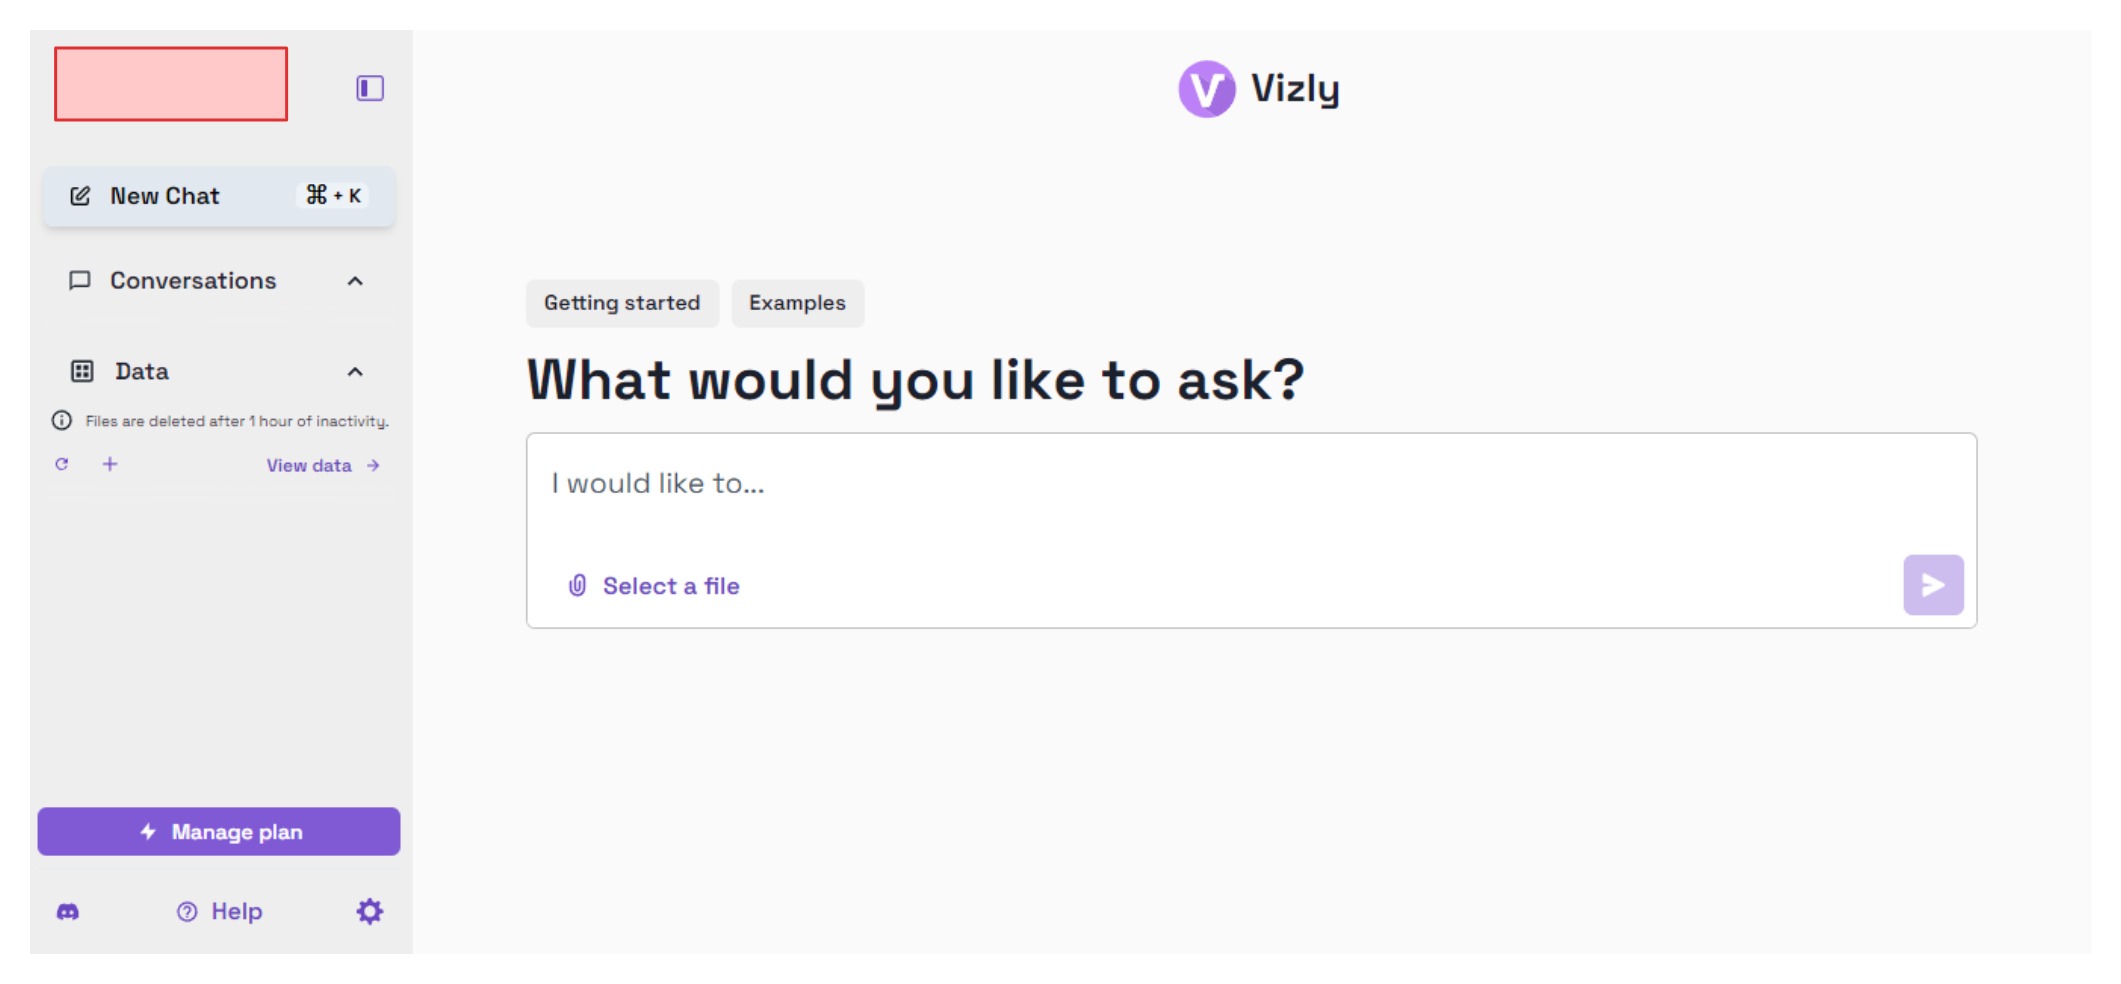

Upload your dataset file and you are good to go:

![](images/setup.gif)

> Currently, Vizly supports CSV, Excel and JSON files but you can request other data formats such as database connections through support or by signing up for the enterprise version.

After uploading a data source, we are asking Vizly what it can do for us:

- Summary statistics
- Data visualization
- Correlation analysis
- Clustering
- Outlier detection
- Price prediction - machine learning

So, let's see how true Vizly is to its words. 

## Performing EDA with Vizly

A good exploratory data analysis (EDA) workflow usually consists of the following steps:

- Printing general information (summary statistics, dataset shape, column names, etc.)
- Data cleaning (structural errors, data quality checks, outlier detection and removal, etc.)
- Univariate analysis (creating single-variable plots)
- Bivariate analysis (plotting two variables against each other)
- Multivariate analysis (creating plots with more than two variables)

These steps can be executed in order or a cycle as needed.

### General information

First, we will start by printing a few dataset attributes. So, paste the following prompt to the UI:

```txt
Let's start with printing general information and summary statistics about the dataset
```

![](images/general_info.gif)

Vizly prints dataset information and the 5-number summary for numeric features. Unlike ChatGPT or Jupyter notebooks, you will see two buttons for editing the input and output generated by Vizly. For example, let's say we don't want to display dataset information using the `.info()` method because it is unnecessarily detailed and instead, just the `.shape` attribute to print dataset dimensions:


![](images/edit_code_2.gif)

To accomplish this, you can highlight the section of the code to change and press "Ctrl + K". Then, write the edited code and press "Accept and run". The output should change immediately, as seen above.

Let's also print the summary statistics for categorical columns as well. The code I have in mind is the following:

```python
$ df.describe(include='category')
```

Let's see if Vizly will use it:

```
Print the summary statistics for categorical columns as well.
```


![](images/describe_cats.gif)

Both input and output is as we expected. However, Vizly referred to categorical columns as `object`, which is the default data type for Pandas when it loads text columns. So, let's fix that along with any other data cleaning issues in the dataset.

### Data cleaning

First, we will write the prompt to replace the `object` data type:

```
Convert `object` data type to Pandas category.
```

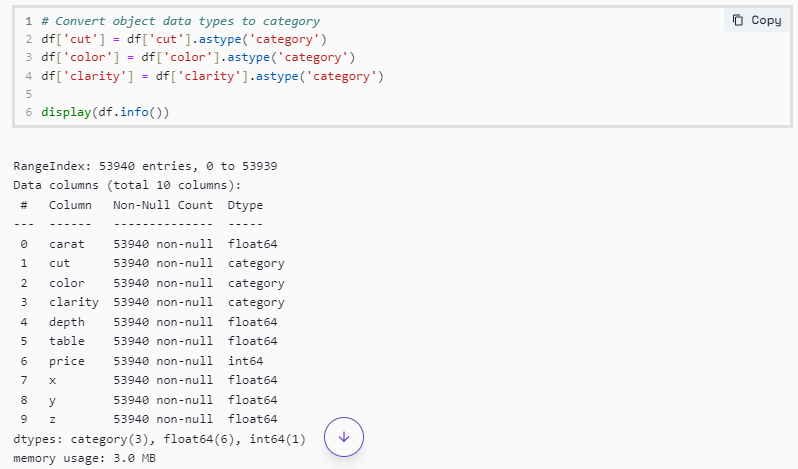

Correct! Now, let's check for missing data:

```
Check for missing or incosistent data
```

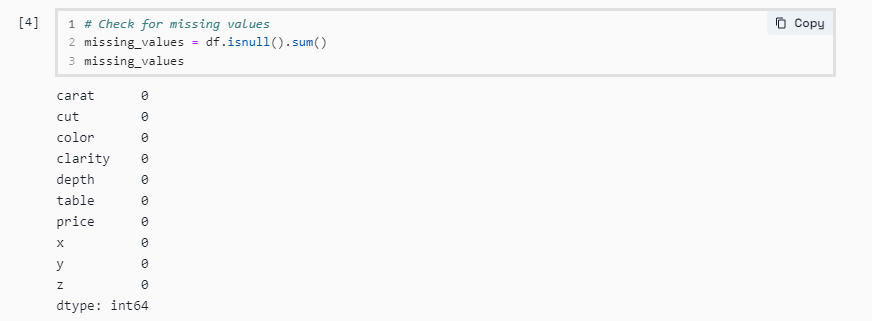

There are none. From a cursory look, I don't see any other problems with the dataset, so let's ask Vizly if it can spot some more:

```
What kind of other data cleaning issues do you see in the dataset?
```

![](images/data_issues.gif)

It says that there are multiple rows with 0 values which don't make sense for diamond measurements. Clearly, those are missing values marked with zeros. We can drop them along with any duplicate rows:

```
Are there duplicates in the dataset? If so, remove those and the rows with 0 values you found above.
```

![](images/drop_rows.gif)

Great, we got rid of any zero values and 146 duplicate rows.

### Handling outliers

Outliers are one of the worst things that can affect the results of your analyses and machine learning models. Therefore, it is essential to detect them and if necessary, remove them from the dataset. 

```
Handle outliers in numerical columns
````

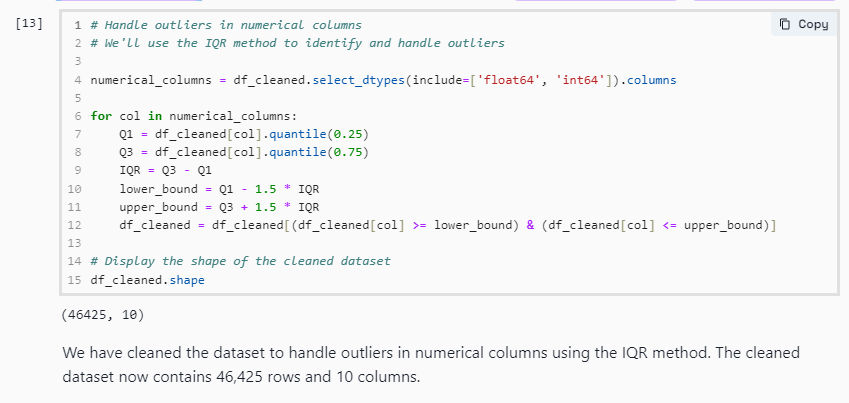

Vizly chose the IQR method and removed more than 6000 outliers. The method marks any data point as an outlier using the following steps:
1. Find the first and third quartiles (25th and 75th percentiles) of the dataset - Q1 and Q3.
2. Find the inter-quartile range: Q3 - Q1.
3. Calculate the lower and upper bounds as shown in the code snippet above.
4. Mark any point as outlier if it is beyond the found bounds.

The disadvantage of the IQR method is that it detects univariate outliers. In complex datasets, this isn't usually good idea because outliers usually are multivariate. This means that value A may look like an outlier on its own but if you look at the row on the whole, it may not be anomalous. However, we have a toy dataset in our hands so, the IQR method will suffice.

If you want, you can ask Vizly to run Isolation Forest algorithm on the dataset through Scikit-learn. With Isolation Forest, you can control what percentage of the most outlying points you want to detect. 

### Univariate analysis

Now, let's start creating some plots:

```
Visualize the distribution of numerical columns
```

![](images/histograms.gif)

It looks like the default plotting library used in Vizly is Plotly. To see the distribution of each numeric feature, Vizly is using histograms. On the surface, the code to generate histograms looks ordinary. However, if you pay attention to the title of the last three histograms, you will see something clever - instead of saying "Distribution of X", Vizly writes "Distribution of X dimension" all on its own. X, Y, Z are column names in the dataset and if Vizly simply wrote "Distribution of X/Y/Z", it would be confusing for many.

Another unique feature of Vizly is the feature to edit charts once they have been created. Using the `Edit chart` button, you can change nearly any aspect of visuals, from the chart type itself to formatting of the tick marks. Below, I am modifying the title of the plot to make it more visually appealing:

![](images/edit_chart_2.gif)

### Bivariate analysis

Bivariate analysis is where you perform tasks like plotting correlation matrix or numeric versus categorical boxplots:

```
Analyze the correlation between numerical columns
```

![](images/correlation_analysis.gif)

The prompt only calculates the correlation matrix but doesn't plot it. So, click on the "Continue analysis" button at the bottom:

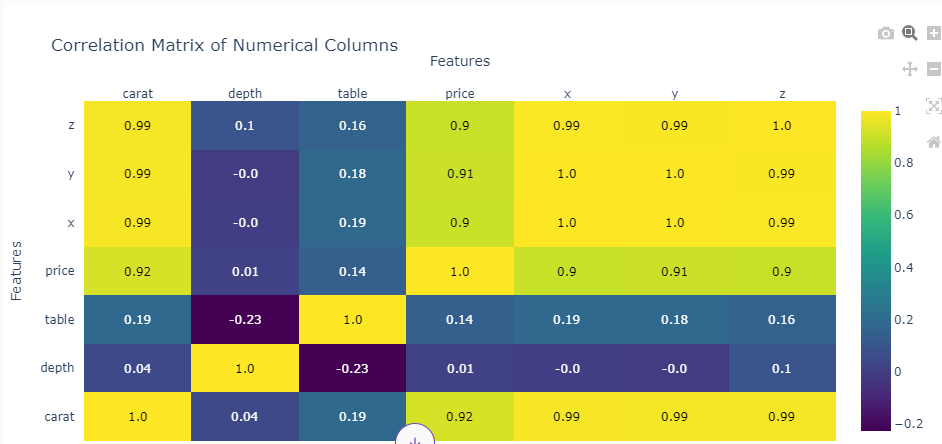

Vizly correctly guesses the next step, which is creating a heatmap on the correlation matrix. This plot isn't as nice looking as it would have been if plotted with Seaborn but it is good enough to see the general trends.

Now, let's see the relationship between each numeric feature and the cut categories of diamonds. We are specifically telling Vizly to use Matplotlib since Plotly has lousy support for subplots:

```
Plot the relationship between each numeric feature and the diamond cut categories using Matplotlib subplots
```

![](images/subplots.gif)

Let's ask Vizly to interpret the subplots:

```
What do you make of these subplots?
```

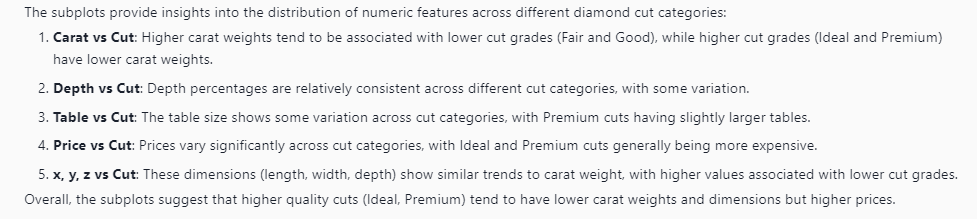

All insights are spot-on (not to mention the fact that we reached them in a very short amount of time). I will leave it to you see the relationships among numeric features and the other two categorical columns. 

### Multivariate analysis

For multivariate analysis, we will content with plotting a pair-plot of all features colored with the diamond cut quality (this should take a moment to run):

```
Plot a pair-plot of numeric features with category for color using Seaborn and Matplotlib
```

![](images/pair_plot.gif)

You can try to find interesting trends/patterns yourself or you can ask Vizly again. 

## Feature engineering

Let's see if Vizly can generate any new features for us to help with machine learning steps in the future:

```
Based on your analysis, what kind of new features can you generate for the dataset?
```

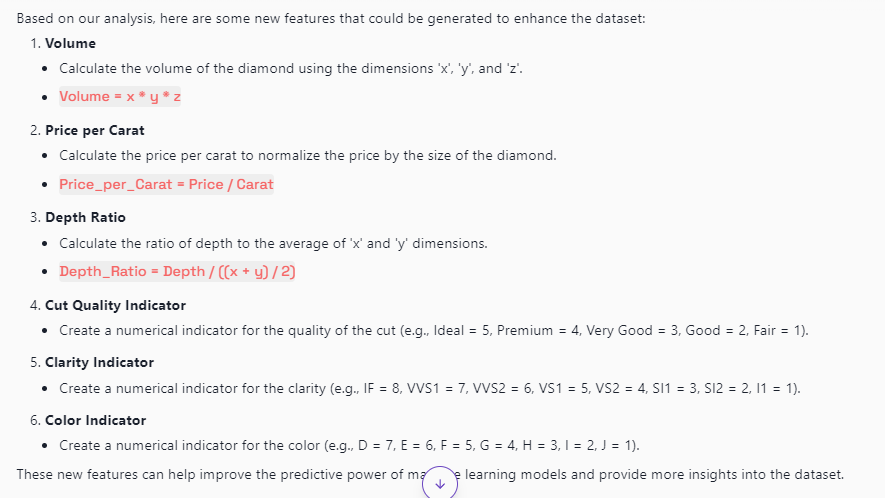

Awesome - Vizly suggests six new features. The last three are simply ordinal encodings of the categorical columns but the first three are gold. Let's tell Vizly to add them to the data frame:

```
Add all of these new features to the dataset
```

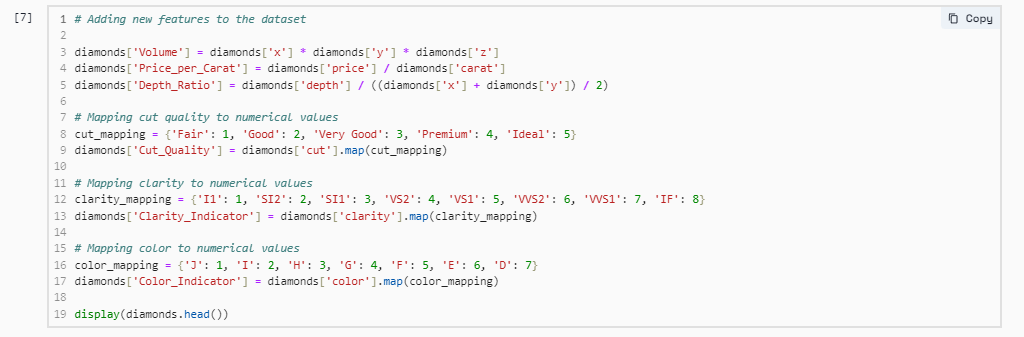

## Wrapping up an analysis

Once you are done with EDA and data cleaning, you can ask Vizly to download the final dataset:

```
Let me download the final dataset
```

![](images/download_dataset.gif)

The data will be available to download as a file and it will also appear in your "Data" tab:

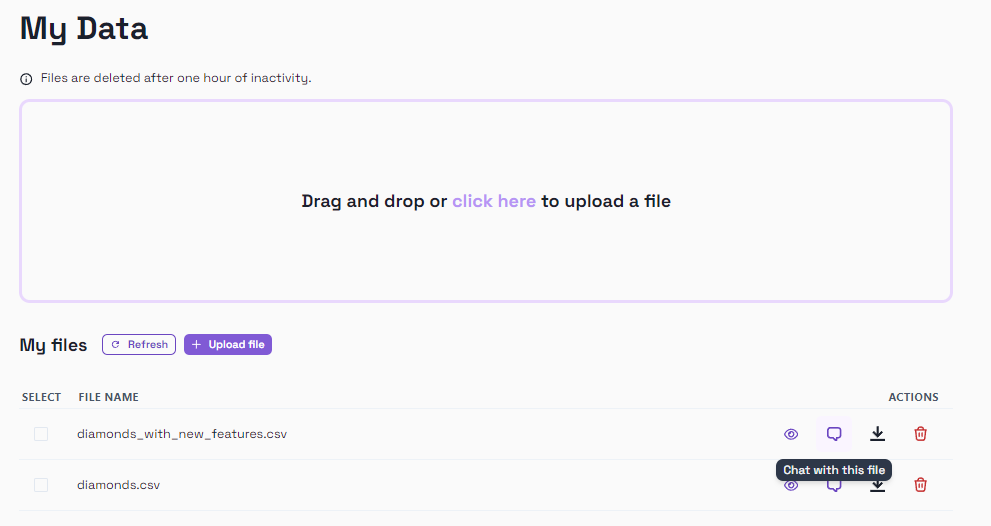

From there, you can launch a new conversation thread on the cleaned dataset to perform other types of analysis or even run some machine learning models.

After everything is done, you can download the entire conversation as PDF or a Jupyter Notebook by using the `Export` button:

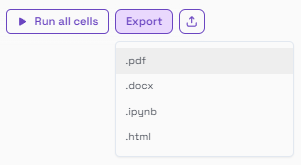

Or even better, you can share the thread as a standalone web page by clicking the `Publish` button:

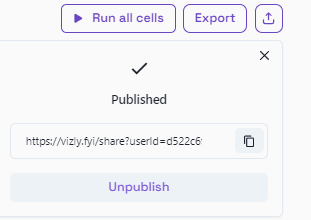

Users will be able to duplicate or rerun the notebook from the link alone:

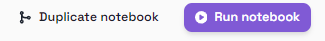

## Data analyst vs. Vizly

Ever since ChatGPT became more capable of data analysis, people have been predicting the death of the data analyst job. I think that is an incorrect presumption.

The job of data analyst is to find trends and insights in the ocean of data and communicate them effectively to their colleagues and project stakeholders. The focus is on the insights themselves, not how the data analyst found them. As far as fast results are concerned, most wouldn't care about whether data analysts used the cool new Python framework or an AI platform. So, tools like Vizly should be seen as enhancements to the workflow of data analysts, not as their replacements.